© 2021 Vahe Galstyan. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](binomial_partitioning.ipynb).
___

# Objective 

In this brief tutorial, we will learn how to generate random numbers and write our in-house function for sampling from the binomial distribution.

## Coin flips

Let us start with the simulation of coin flips in a case where the probability of heads ($p$) is not necessarily 1/2. To do this, we will use `numpy`'s the random number generator function called `numpy.random.rand()` which returns uniformly distributed numebers in the $[0,1]$ interval. Since the probability of heads also falls within the same interval, a convenient way for simulating random "heads" outcomes will be to generate a random number in the $[0,1]$ interval and accept the toss as "heads" if this number is less than or equal to $p$. Let's code this up:

In [3]:
# Load the standard libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Generate a single toss event

p = 0.2 # Probability of heads
x = np.random.rand() # Random number in [0,1]

# Simulate a random outcome
if x <= p:
    outcome = 'H'
else:
    outcome = 'T'
print(outcome)

T


Running the block multiple times, we can see that the outcome is 'T' most of the time, which is what we would expect from our choice of a small $p$ value. To be convinced about the validity of this method, however, we need to gather statistics from multiple realizations. Let's do that.

In [33]:
N = 1000 # Number of 'coin flips'
n_heads = 0 # Variable to keep track of the number of 'heads'

for i in range(N):
    x = np.random.rand() # Random number in [0,1]
    if x <= p:
        n_heads = n_heads + 1
print(n_heads/N)

0.207


This looks much more convincing! Out of 1000 simulated coin flips, 207 landed on 'H' which implies an estimated probability of heads $\hat{p} = 0.207$ - pretty close to our prescribed value. We will now use this machinery to perform a binomial partitioning.

## Sampling from a binomial distribution

Recall the story behind the binomial distribution - is we tosses a biased coin $N$ times, then the number of times we get 'heads' ($n_H$) will be distributed binomially ($n_H \sim B(N,p)$). The block of code above does exactly this task. We can turn it into a function to reuse in the future.

In [34]:
def sample_binomial(N,p):
    n_heads = 0 # Variable to keep track of the number of 'heads'

    for i in range(N):
        x = np.random.rand() # Random number in [0,1]
        if x <= p:
            n_heads = n_heads + 1
    return n_heads

Now, let's call this function lots of times and make a histogram of the numbers of heads we get in the different realizations.

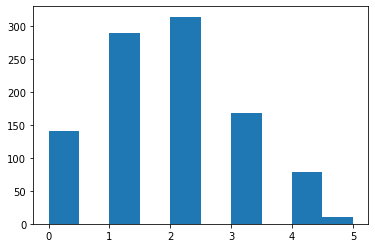

In [86]:
n_trial = 1000 # Number of experiment repeats

N = 9 # Number of tosses in each experiment
p = 0.2 # Probability of heads

n_heads_arr = np.zeros(n_trial)
for i in range(n_trial):
    n_heads = sample_binomial(N,p)
    n_heads_arr[i] = n_heads

plt.hist(n_heads_arr);

Ugh.. This histogram looks ugly. It's because by default the histogram function does not bin at integer positions. We could force it to bin properly by specifying the binning locations, but we'll write our own version instead. We simply need to calculate the number of trials that led to the given total number of heads $i$ for all possible values of $i=0,1,...,N$ and make a scatter plot of the resulting pairs.

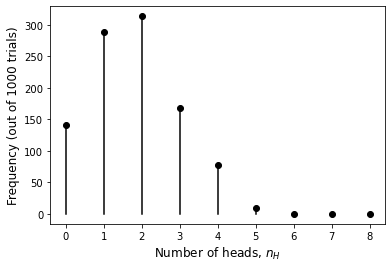

In [111]:
for i in range(N):
    n_i = np.sum(n_heads_arr == i) # Number of trials with 'i' heads
    plt.scatter(i, n_i, color='k') 
    plt.plot([i,i], [0,n_i], color='k') # Add vertical lines for better looks
plt.xlabel(r'Number of heads, $n_H$', fontsize=12)
plt.ylabel(r'Frequency (out of %d trials)'%n_trial, fontsize=12)
plt.show()

This looks much better! To see if the peak location makes sense, remember that the mean of the binomial distribution is $\langle n_H \rangle = Np = 1.8$ for our parameter choices ($N=9$ and $p=0.4$). Indeed, the peak is around 2 which passes our sanity check.

As a last comment, notice that the $y$-axis of the histogram we made represents the number of trials for the given outcome, whereas the binomial distribution is a *probability distribution* that gives the probability of each outcome. We can therefore divide the values on the $y$-axis by the number of trials to yield an actual probability distribution.

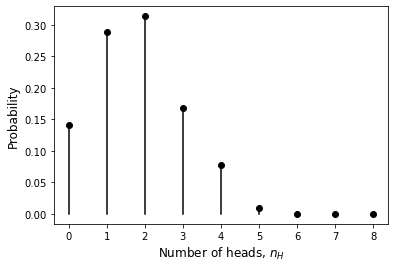

In [114]:
for i in range(N):
    n_i = np.sum(n_heads_arr == i) # Number of trials with 'i' heads
    plt.scatter(i, n_i/n_trial, color='k') 
    plt.plot([i,i], [0,n_i/n_trial], color='k') # Add vertical lines for better looks
plt.xlabel(r'Number of heads, $n_H$', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()

There you have it. You can now use the function `sample_binomial` to generate different outcomes of fluorophore allocation in daughter cells for Problem 2 of this week's homework. You are also welcome to write your own function (e.g., one that executes much faster that the tutorial version by eliminating the `for` loop) or use one of the built-in Python functions that does the job for you.